importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

----

DETAILS ABOUT THE DATASET:
An experiment was conducted on 5000 participants to study the effects of age and physical health on hearing loss, specifically the ability to hear high pitched tones. This data displays the result of the study in which participants were evaluated and scored for physical ability and then had to take an audio test (pass/no pass) which evaluated their ability to hear high frequencies. The age of the user was also noted. Is it possible to build a model that would predict someone's liklihood to hear the high frequency sound based solely on their features (age and physical score)?

* Features

    * age - Age of participant in years
    * physical_score - Score achieved during physical exam

* Label/Target

    * test_result - 0 if no pass, 1 if test passed
    
----

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


## EXPLORATORY DATA ANALYSIS 

In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


scatterplot of age vs test_result

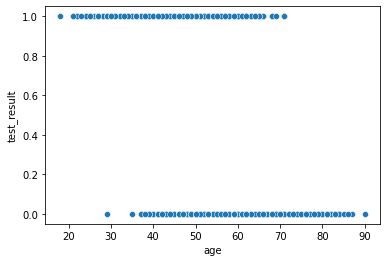

In [6]:
sns.scatterplot(x='age',y='test_result',data=df)
plt.show()

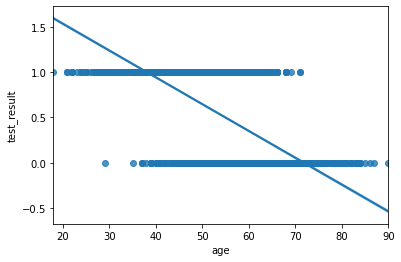

In [7]:
sns.regplot(x='age',y='test_result',data=df)
plt.show()

scatterplot of physical_score vs test_result.

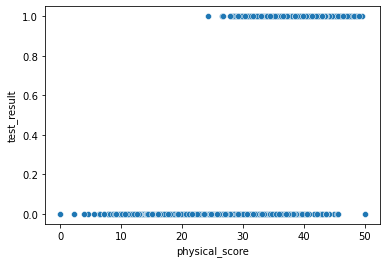

In [8]:
sns.scatterplot(x='physical_score',y='test_result',data=df)
plt.show()

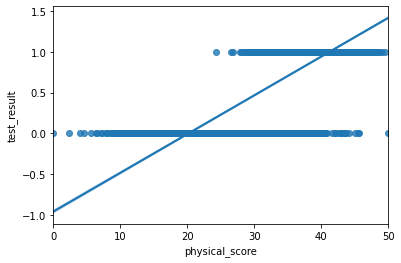

In [9]:
# we can't use a simple regression line to deal with such data
sns.regplot(x='physical_score',y='test_result',data=df)
plt.show()

In [10]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

/Users/isita/Downloads/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='test_result', ylabel='count'>

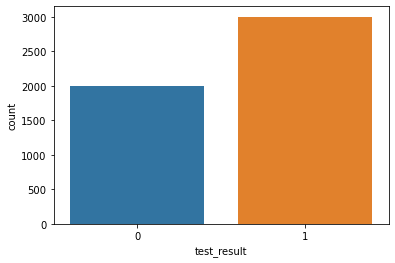

In [11]:
sns.countplot(df['test_result'])

from the above visualization we can say that the number of people who passed the test are more than the ones who failed

<AxesSubplot:xlabel='test_result', ylabel='age'>

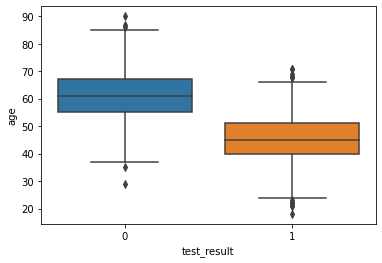

In [12]:
sns.boxplot(x='test_result',y='age',data=df)

the above visualization says people who did not pass the test are older than people who passed the test.

<AxesSubplot:xlabel='age', ylabel='physical_score'>

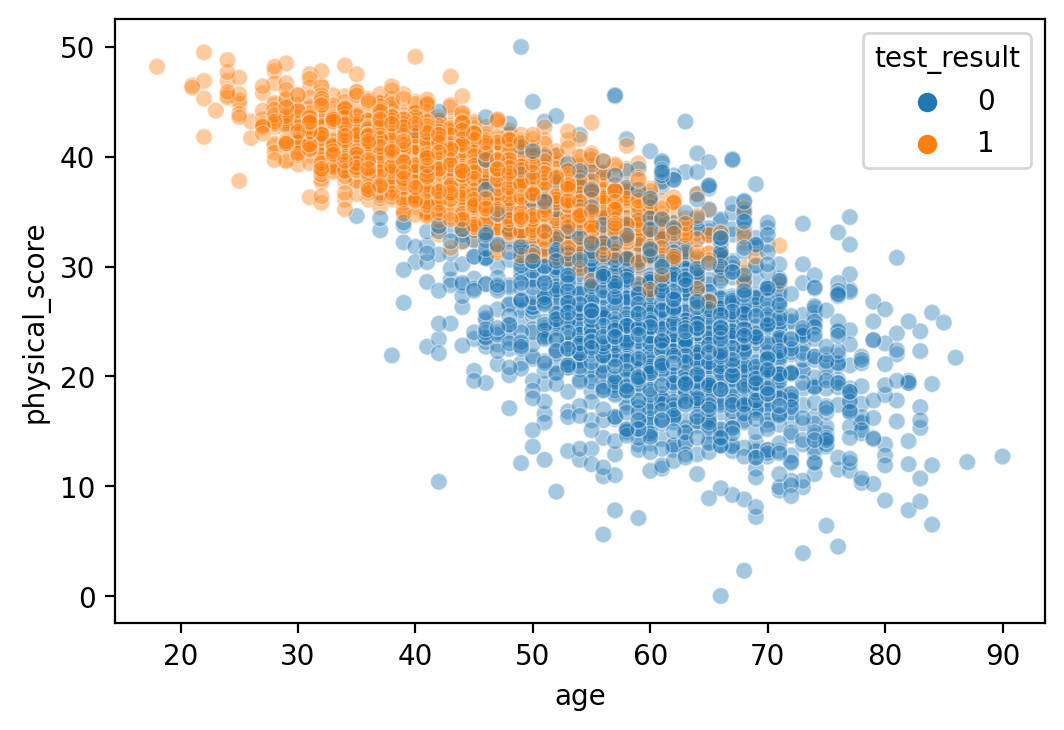

In [13]:
plt.figure(dpi=200)
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result',alpha=0.4)

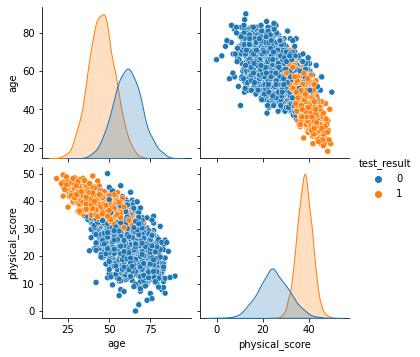

In [14]:
sns.pairplot(df,hue='test_result')

<AxesSubplot:>

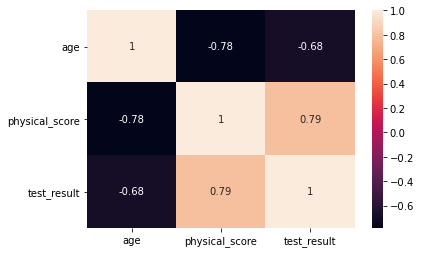

In [15]:
sns.heatmap(df.corr(), annot=True)

3-D visualization

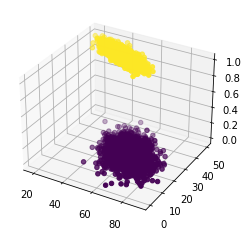

In [16]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])

TRAIN - TEST - SPLIT

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X=df.drop('test_result',axis=1)
y=df['test_result']

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [21]:
scaler = StandardScaler()

In [22]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()

In [25]:
model.fit(scaled_X_train,y_train)

LogisticRegression()

In [26]:
model.coef_

array([[-0.94953524,  3.45991194]])

In [27]:
y_pred= model.predict(scaled_X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [28]:
probabilities= model.predict_proba(scaled_X_test)

In [29]:
probabilities

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [32]:
accuracy_score(y_test,y_pred)

0.93

In [33]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]])

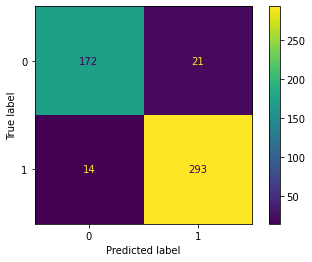

In [34]:
plot_confusion_matrix(model,scaled_X_test,y_test)

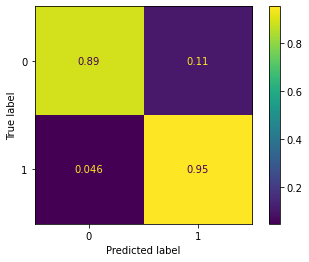

In [35]:
# Scaled so highest value=1
plot_confusion_matrix(model,scaled_X_test,y_test,normalize='true')

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [37]:
X_train.iloc[0]

age               32.0
physical_score    43.0
Name: 141, dtype: float64

In [38]:
y_train.iloc[0]

1

In [40]:
# 0% probability of 0 class
# 100% probability of 1 class
model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

array([[0., 1.]])

In [41]:
model.predict(X_train.iloc[0].values.reshape(1, -1))

array([1])

# ROC - AUC - PRECISION RECALL CURVE

In [42]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

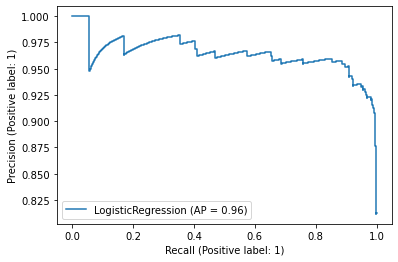

In [43]:
plot_precision_recall_curve(model,scaled_X_test,y_test)

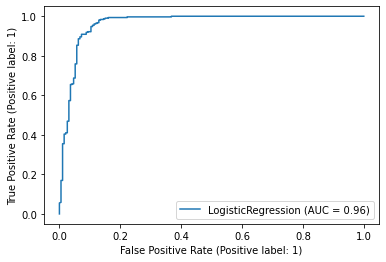

In [45]:
plot_roc_curve(model,scaled_X_test,y_test)

In [50]:
from sklearn.metrics import average_precision_score, roc_auc_score

In [49]:
#area under the precision-recall curve
print(average_precision_score(y_test,y_pred))

0.9185682690512251


In [51]:
#Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
print(roc_auc_score(y_test,y_pred))

0.9227945519906837
